In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target

df = pd.DataFrame(X, columns=cancer.feature_names)
df['target'] = y

print("Shape:", df.shape)
df.head()


Shape: (569, 31)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


/tmp/ipython-input-3-3025217003.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='Set1')


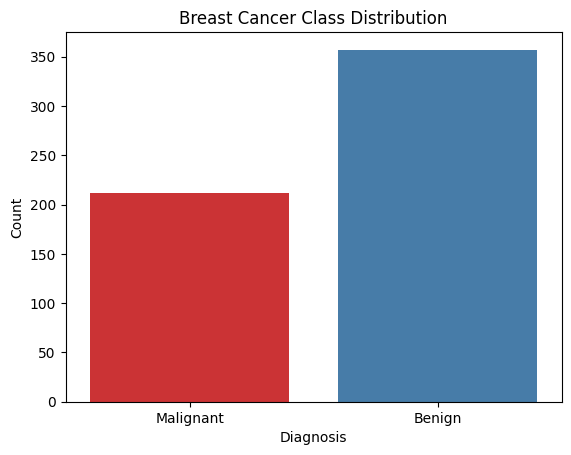

In [3]:
sns.countplot(x='target', data=df, palette='Set1')
plt.xticks([0, 1], ['Malignant', 'Benign'])
plt.title("Breast Cancer Class Distribution")
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.show()


In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = SVC(kernel='linear', C=1)
scores = cross_val_score(model, X_scaled, y, cv=5)

print("Cross-Validation Scores:", scores)
print("Mean Accuracy: {:.2f}%".format(np.mean(scores) * 100))


Cross-Validation Scores: [0.95614035 0.98245614 0.96491228 0.96491228 0.98230088]
Mean Accuracy: 97.01%


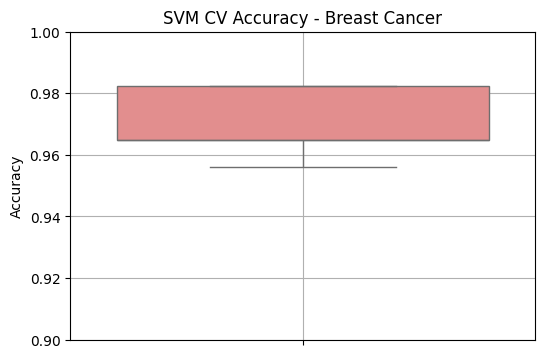

In [5]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=scores, color='lightcoral')
plt.title("SVM CV Accuracy - Breast Cancer")
plt.ylabel("Accuracy")
plt.ylim(0.9, 1.0)
plt.grid(True)
plt.show()
